<a href="https://colab.research.google.com/github/omar-aromo/Mod5Task3/blob/master/Mod5Task3_OAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline, make_pipeline

In [0]:
#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

In [0]:
#dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
#cross validation
from sklearn.model_selection import train_test_split

In [0]:
#data
rawData = pd.read_csv('https://raw.githubusercontent.com/omar-aromo/Mod5Task3/master/default%20of%20credit%20card%20clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
#Examinando la estructura de los datos
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [0]:
rawData = rawData.astype({"ID":'category', "SEX":'category', "EDUCATION":'category', "AGE":'category', "MARRIAGE":'category', "PAY_0":'category', "PAY_2":'category', "PAY_3":'category', "PAY_4":'category', "PAY_5":'category', "PAY_6":'category', "default payment next month":'category'})

In [0]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null category
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-nu

In [0]:
#features
features = rawData.iloc[:,1:11]
print('Resumen de muestra de características')
features.head()

Resumen de muestra de características


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,20000,2,2,1,24,2,2,-1,-1,-2
1,120000,2,2,2,26,-1,2,0,0,0
2,90000,2,2,2,34,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0


In [0]:
#variable dependiente
depVar = rawData['default payment next month']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar)

In [0]:
X_train.shape, X_test.shape

((22500, 10), (7500, 10))

In [0]:
#Models
modelSVM = SVC()
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()

In [0]:
modelSVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
print(cross_val_score(modelSVM, X_train, y_train))

[0.778      0.778      0.778      0.778      0.77777778]


In [0]:
print(cross_val_score(modelRF, X_train, y_train))
#[AUC]

[0.78977778 0.79311111 0.798      0.79177778 0.794     ]


In [0]:
print(cross_val_score(modelKNN, X_train, y_train))

[0.79       0.78711111 0.792      0.78733333 0.77933333]


In [0]:
modelSVM.score(X_train, y_train)

0.7779555555555555

In [0]:
modelRF.score(X_train, y_train)
#Return the mean accuracy on the given test data and labels.

0.9684888888888888

In [0]:
modelKNN.score(X_train, y_train)

0.8351111111111111

Despues de lo visto en clase decido escoger KNN

In [0]:
RF_predict = modelRF.predict(X_test)

In [0]:
accuracy_score(y_test, RF_predict)

0.7912

In [0]:
SVM_predict = modelSVM.predict(X_test)

In [0]:
accuracy_score(y_test, SVM_predict)

0.7813333333333333

In [0]:
KNN_predict = modelKNN.predict(X_test)

In [0]:
accuracy_score(y_test, KNN_predict)

0.7932

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88      5860
           1       0.55      0.29      0.38      1640

    accuracy                           0.79      7500
   macro avg       0.69      0.61      0.63      7500
weighted avg       0.76      0.79      0.77      7500



In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, SVM_predict))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5860
           1       0.00      0.00      0.00      1640

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, RF_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5860
           1       0.53      0.36      0.43      1640

    accuracy                           0.79      7500
   macro avg       0.68      0.64      0.65      7500
weighted avg       0.77      0.79      0.78      7500



In [0]:
KNN_predict

array([0, 0, 0, ..., 0, 0, 0])

**RF muestra signos de overfitting**

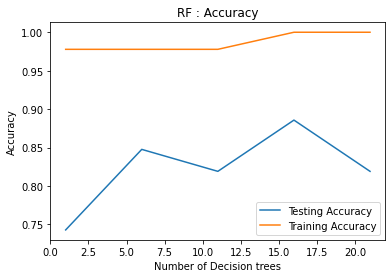

In [0]:
estimators = np.arange(1,25, 5)
train_acc = np.empty(len(estimators))
test_acc = np.empty(len(estimators))

for counter, values in enumerate(estimators):
    rf = make_pipeline(StandardScaler(),PCA(n_components= 2),RandomForestClassifier(n_estimators=values, criterion='entropy'))
    rf.fit(X_train, y_train)
    train_acc[counter] = rf.score(X_train, y_train)
    test_acc[counter] = rf.score(X_test, y_test)

plt.title('RF : Accuracy')
plt.plot(estimators, test_acc, label = 'Testing Accuracy')
plt.plot(estimators, train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Decision trees')
plt.ylabel('Accuracy')
plt.show()

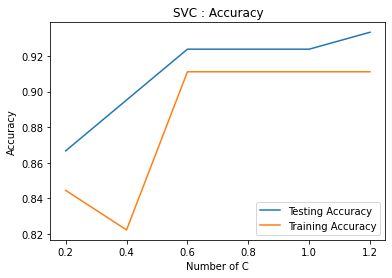

In [0]:
estimators = np.arange(.2,1.4, .2)
train_acc = np.empty(len(estimators))
test_acc = np.empty(len(estimators))

for counter, values in enumerate(estimators):
    svc = make_pipeline(StandardScaler(),PCA(n_components= 2),SVC(C=values,kernel='rbf'))
    svc.fit(X_train, y_train)
    train_acc[counter] = svc.score(X_train, y_train)
    test_acc[counter] = svc.score(X_test, y_test)

plt.title('SVC : Accuracy')
plt.plot(estimators, test_acc, label = 'Testing Accuracy')
plt.plot(estimators, train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.show()

**KNN es el modelo optimo**

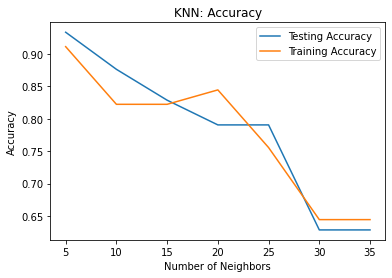

In [0]:
neighbors = np.arange(5,40, 5)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

# test different K values

for counter, values in enumerate(neighbors):
    knn = make_pipeline(StandardScaler(),PCA(n_components=2),KNeighborsClassifier(n_neighbors=values))
    knn.fit(X_train, y_train)
    train_acc[counter] = knn.score(X_train, y_train)
    test_acc[counter] = knn.score(X_test, y_test)

### generate accuracy plot
plt.title('KNN: Accuracy')
plt.plot(neighbors, test_acc, label = 'Testing Accuracy')
plt.plot(neighbors, train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()